In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [9]:
txt_fdiry = FD_RES
txt_fdiry = file.path(txt_fdiry, "assay_fcc", "STARR_ATAC_K562_Reddy_KS274")
txt_fdiry = file.path(txt_fdiry, "coverage", "fcc_astarr_macs", "astarr_macs_input_union")
txt_fdiry = file.path(txt_fdiry, "overlap_count_unique")
dir(txt_fdiry)

[1] "ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz"
[2] "ASTARRseq_K562_KS274.hg38.Output.rep2.WGS.unstranded.bed.gz"
[3] "ASTARRseq_K562_KS274.hg38.Output.rep3.WGS.unstranded.bed.gz"

In [10]:
txt_fdiry = FD_RES
txt_fdiry = file.path(txt_fdiry, "assay_fcc", "STARR_ATAC_K562_Reddy_KS274")
txt_fdiry = file.path(txt_fdiry, "coverage", "fcc_astarr_macs", "astarr_macs_input_union")
txt_fdiry = file.path(txt_fdiry, "overlap_count_unique")
vec = dir(txt_fdiry)

lst = lapply(vec, function(txt_fname){
    txt_fpath = file.path(txt_fdiry, txt_fname)
    dat = read_tsv(txt_fpath, col_names = c("Chrom", "ChromStart", "ChromEnd", "Count"))
    dat$Sample = txt_fname
    return(dat)
})

Rows: 246702 Columns: 4
── Column specification ─────────────────────────────────────────────
Delimiter: "\t"
chr (1): Chrom
dbl (3): ChromStart, ChromEnd, Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 246624 Columns: 4
── Column specification ─────────────────────────────────────────────
Delimiter: "\t"
chr (1): Chrom
dbl (3): ChromStart, ChromEnd, Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 246703 Columns: 4
── Column specification ─────────────────────────────────────────────
Delimiter: "\t"
chr (1): Chrom
dbl (3): ChromStart, ChromEnd, Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
dat = lst[[1]]
head(dat)

Chrom,ChromStart,ChromEnd,Count,Sample
<chr>,<dbl>,<dbl>,<dbl>,<chr>
chr1,14253,14645,5,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz
chr1,16015,16477,9,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz
chr1,17237,17772,13,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz
chr1,28903,29613,2,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz
chr1,30803,31072,3,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz
chr1,101603,101849,8,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz


In [ ]:
dat = data.frame(
    CumSum = cumsum(Count),
    CumRow = 1:length(vec)
)
head(dat)

In [16]:
tmp = lapply(lst, function(dat){
    dat = dat %>% dplyr::mutate(
        CumSum = cumsum(Count),
        CumRow = 1:nrow(dat)
    )
    return(dat)
})

In [17]:
dat = tmp[[1]]
head(dat)

Chrom,ChromStart,ChromEnd,Count,Sample,CumSum,CumRow
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>
chr1,14253,14645,5,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,5,1
chr1,16015,16477,9,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,14,2
chr1,17237,17772,13,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,27,3
chr1,28903,29613,2,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,29,4
chr1,30803,31072,3,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,32,5
chr1,101603,101849,8,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,40,6


In [18]:
dat = bind_rows(tmp)
head(dat)

Chrom,ChromStart,ChromEnd,Count,Sample,CumSum,CumRow
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>
chr1,14253,14645,5,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,5,1
chr1,16015,16477,9,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,14,2
chr1,17237,17772,13,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,27,3
chr1,28903,29613,2,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,29,4
chr1,30803,31072,3,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,32,5
chr1,101603,101849,8,ASTARRseq_K562_KS274.hg38.Output.rep1.WGS.unstranded.bed.gz,40,6


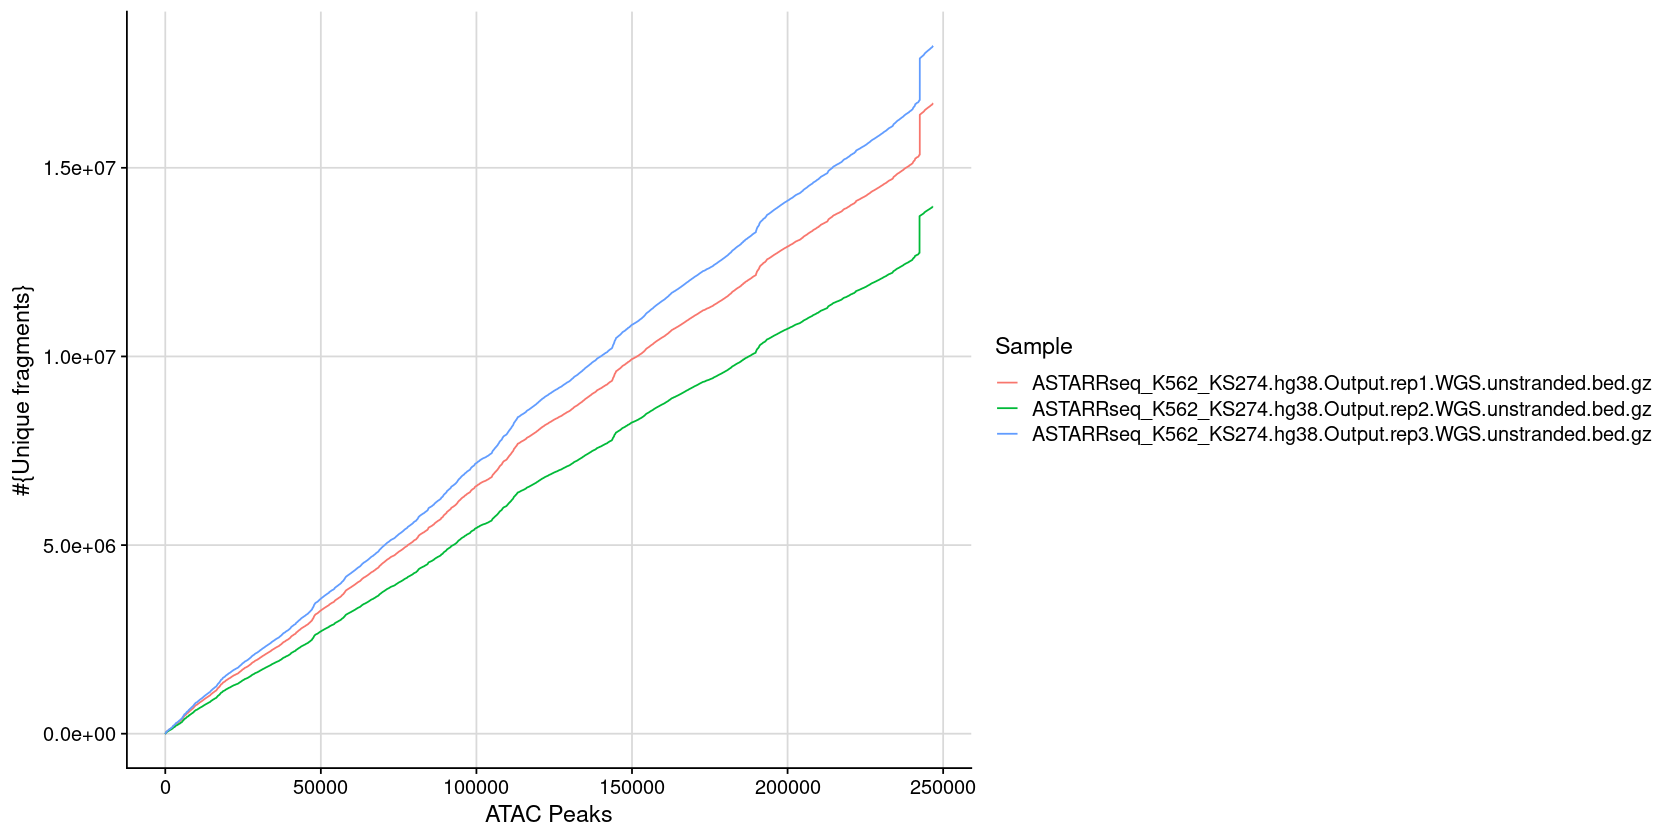

In [26]:
gpt = ggplot(dat, aes(x=CumRow, y=CumSum, group=Sample, color=Sample)) + 
        geom_line() + 
        labs(x="ATAC Peaks", y="#{Unique fragments}") +
        theme_cowplot() +
        background_grid()

options(repr.plot.height=7, repr.plot.width=14)
print(gpt)